# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
2+2

4

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#here we are deciding what fields are important to analyze and which ones do not have factors we ant to look at
drop_list = ['id', 'name', 'host_id', 'host_name']

include_list = ['room_type', 'neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','short_or_long']

In [5]:
#Shape tells us the amount of rows / columns
df.shape

(48895, 16)

In [6]:
#info tells us what kind of data we have, how many columns names, if null, and if not how many corrisponding entries and data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

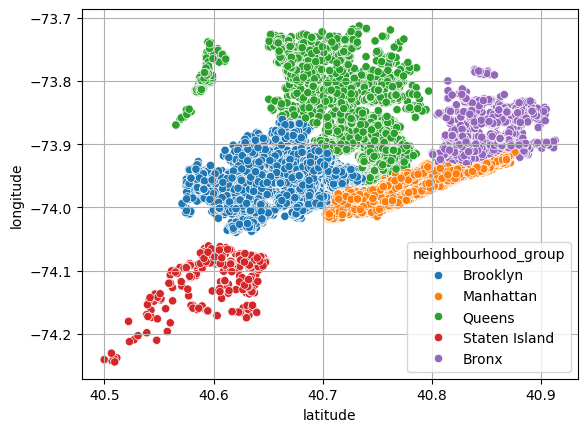

In [7]:
#take a look at the pseudo map of NYC.  Because we want hue we need a to use Seaborn (more color)
sns.scatterplot (data=df, x='latitude', y='longitude', hue='neighbourhood_group')
plt.grid()

In [8]:
#how many unique names/titles are there?
df['name'].nunique()


47905

In [9]:
#how many room types
df['room_type'].nunique()

3

In [10]:
#the 3 room types by name
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [11]:
#look at the room types by price and get the average price for each
df.groupby('room_type')['price'].mean()


room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

In [12]:
# grouping our dataframe by neighbourhood_group and room_type by price.  
# Describe() provides a quick statistical summary of the data, offering 
# insights into its central tendency, dispersion, and shape of distribution.  associated with Pandas
# round rounds the number
round(df.groupby(['room_type', 'neighbourhood_group'])['price'].describe())

count   mean    std   min    25%  \
room_type       neighbourhood_group                                       
Entire home/apt Bronx                  379.0  128.0   95.0  28.0   80.0   
                Brooklyn              9559.0  178.0  226.0   0.0  105.0   
                Manhattan            13199.0  249.0  332.0   0.0  142.0   
                Queens                2096.0  147.0  129.0  10.0   90.0   
                Staten Island          176.0  174.0  395.0  48.0   75.0   
Private room    Bronx                  652.0   67.0  107.0   0.0   40.0   
                Brooklyn             10132.0   77.0  125.0   0.0   50.0   
                Manhattan             7982.0  117.0  190.0  10.0   68.0   
                Queens                3372.0   72.0  181.0  10.0   47.0   
                Staten Island          188.0   62.0   36.0  20.0   40.0   
Shared room     Bronx                   60.0   60.0  102.0  20.0   28.0   
                Brooklyn               413.0   51.0   53.0   0.0   30.0   
                Manhattan              480.0   89.0   92.0  10.0   49.0   
                Queens                 198.0   69.0  171.0  11.0   30.0   
                Staten Island            9.0   57.0   45.0  13.0   29.0   

                                       50%    75%      max  
room_type       neighbourhood_group                         
Entire home/apt Bronx                100.0  140.0   1000.0  
                Brooklyn             145.0  199.0  10000.0  
                Manhattan            191.0  259.0  10000.0  
                Queens               120.0  168.0   2600.0  
                Staten Island        100.0  151.0   5000.0  
Private room    Bronx                 54.0   70.0   2500.0  
                Brooklyn              65.0   80.0   7500.0  
                Manhattan             90.0  120.0   9999.0  
                Queens                60.0   75.0  10000.0  
                Staten Island         50.0   75.0    300.0  
Shared room     Bronx                 40.0   56.0    800.0  
                Brooklyn              36.0   50.0    725.0  
                Manhattan             69.0   89.0   1000.0  
                Queens                37.0   54.0   1800.0  
                Staten Island         30.0   75.0    150.0

<Axes: xlabel='number_of_reviews', ylabel='price'>

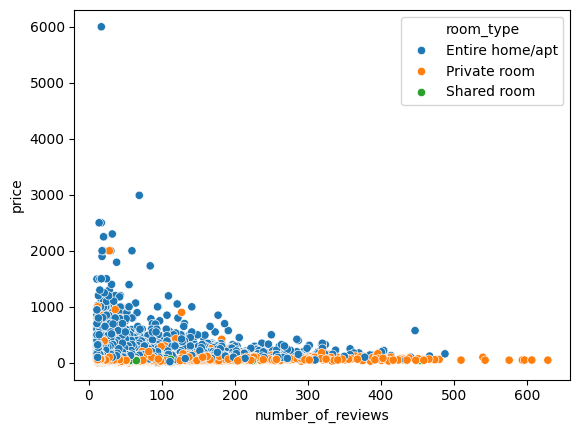

In [13]:
#graphing number_of_reviews and price.  [df['price'] > 10] slices the df to look at number_of_reviews that are greater than 10 reviews
sns.scatterplot (data=df[df['number_of_reviews'] > 10], x='number_of_reviews', y = 'price', hue='room_type')

<Axes: xlabel='minimum_nights', ylabel='price'>

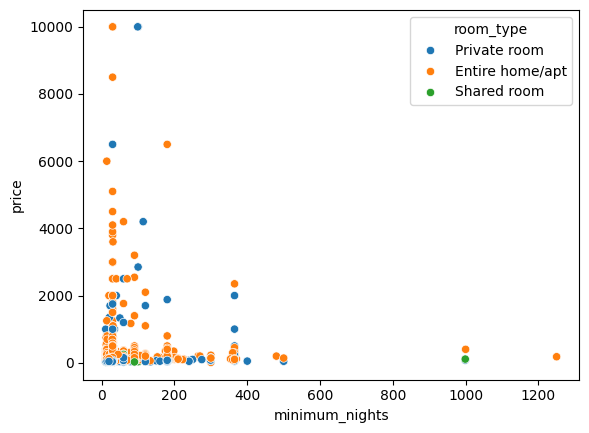

In [14]:
#graphing number_of_reviews and price.  [df['price'] > 10] slices the df to look at number_of_reviews that are greater than 10 reviews
sns.scatterplot (data=df[df['minimum_nights'] > 10], x='minimum_nights', y = 'price', hue='room_type')

<Axes: xlabel='minimum_nights', ylabel='Count'>

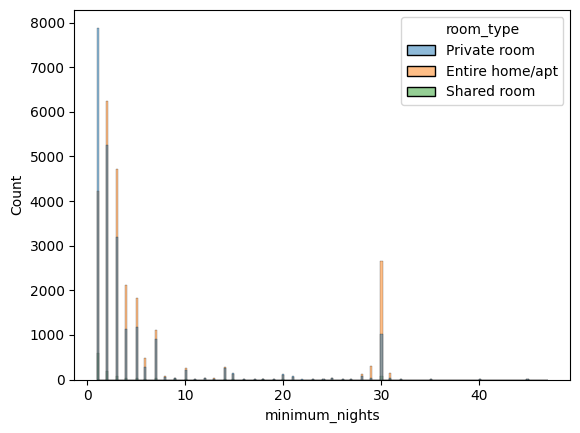

In [15]:
# graphing of minimum_nights. splice in and filter to less than x(50)
sns.histplot(data=df[df["minimum_nights"] < 50], x='minimum_nights', hue='room_type')

In [16]:
#how many neighbourhoods - 221 - too many, dont need this
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

<Axes: xlabel='minimum_nights', ylabel='Density'>

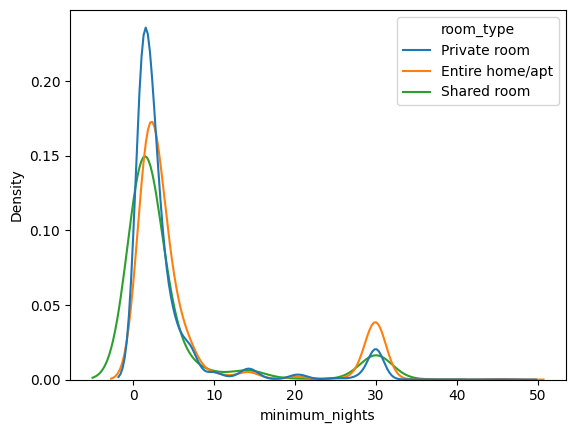

In [17]:
# graphing of minimum_nights. splice in and filter to less than x(50)... KDE plot
# (Kernel Density Estimate plot) is a method for visualizing the probability density function of a continuous variable. 
# It provides a smooth, continuous curve that represents the underlying distribution of a dataset, as opposed to a histogram which uses discrete bars. 
sns.kdeplot(data=df[df["minimum_nights"] < 50], x='minimum_nights', hue='room_type', common_norm=False)

In [18]:
###FEATURE ENGINEERING


In [19]:
#function to know amount of nights, short or long stay or unknown
def short_long_stay(x):
    if x > 31:
        return 'long'
    elif x <= 31:
        return 'short'
    else: return 'unknown'

In [20]:
#apply function and create a variable

# apply() method is a versatile function used in various programming 
# contexts, particularly in data manipulation and functional programming. 
# Its core purpose is to execute a given function on elements of a data structure or with a specific context.

df['short_or_long'] = df['minimum_nights'].apply(short_long_stay)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,short_or_long
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,short
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,short
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,short
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,short
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,short


In [21]:
#how many short and long
df['short_or_long'].value_counts()

short_or_long
short    48349
long       546
Name: count, dtype: int64

In [22]:
# look at data of short_or_long
df.groupby('short_or_long')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
short_or_long,,,,,,,,
long,546.0,257.254579,784.385013,12.0,70.0,109.0,174.75,10000.0
short,48349.0,151.540197,226.417904,0.0,69.0,106.0,175.00,10000.0


<Axes: xlabel='price'>

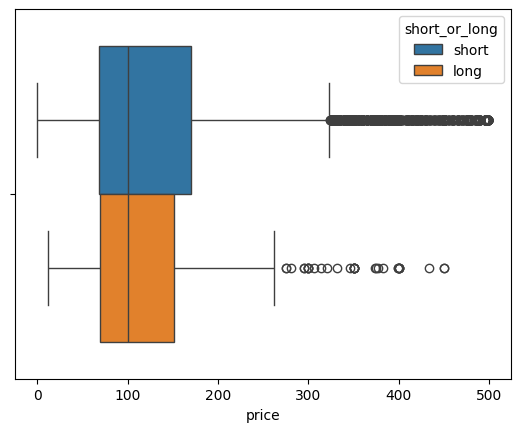

In [23]:
# box plot slided down to less than $500
sns.boxplot(data=df[df['price'] < 500], x='price', hue='short_or_long')

In [24]:
# how many host names - dont need too many
df['host_name'].nunique()


11452

<Axes: xlabel='minimum_nights', ylabel='Count'>

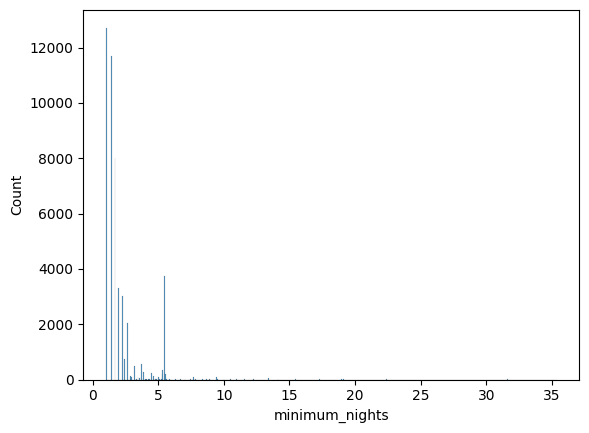

In [25]:
# square root of the variable to compress it down
sns.histplot(x=np.sqrt(df['minimum_nights']))

<Axes: xlabel='minimum_nights', ylabel='Count'>

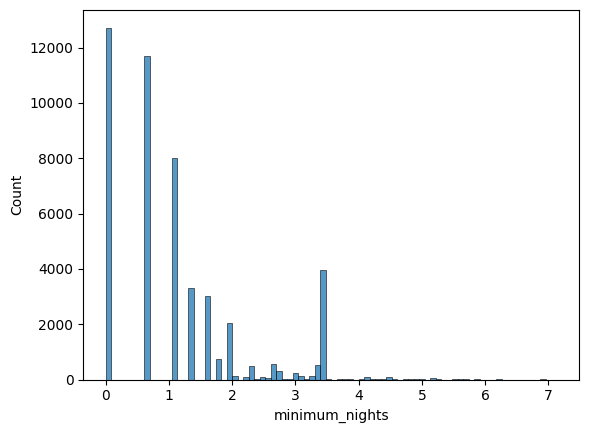

In [26]:
# log transformation 
sns.histplot(x=np.log(df['minimum_nights']))

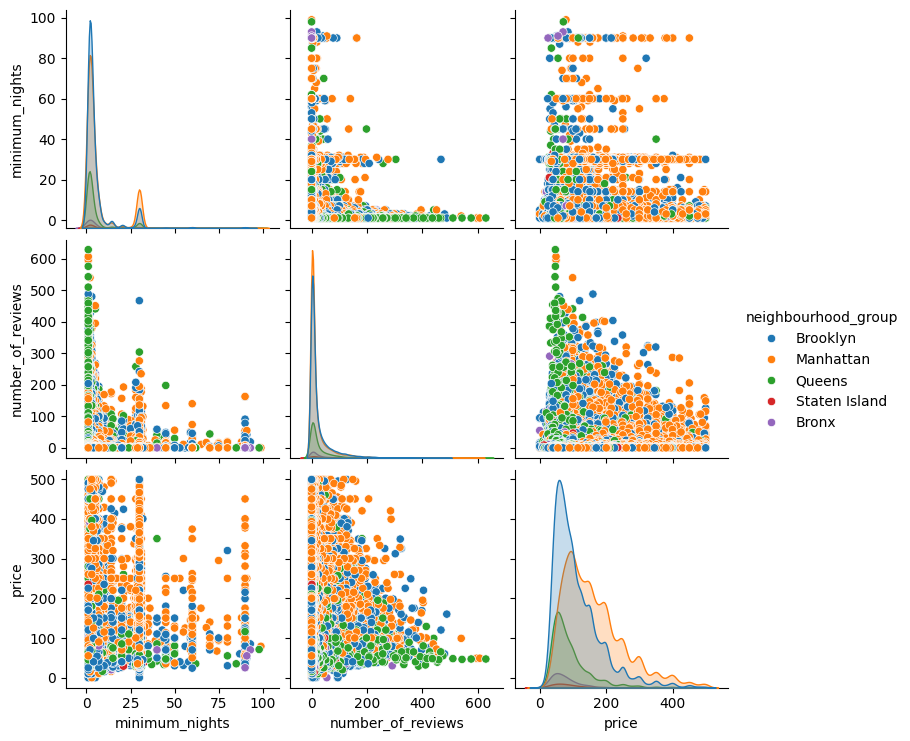

In [27]:
pairplot_list = ['neighbourhood_group', 'minimum_nights', 'number_of_reviews', 'price']

sns.pairplot(data=df[(df['price'] < 500) & (df['minimum_nights'] < 100)][pairplot_list], hue='neighbourhood_group')

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

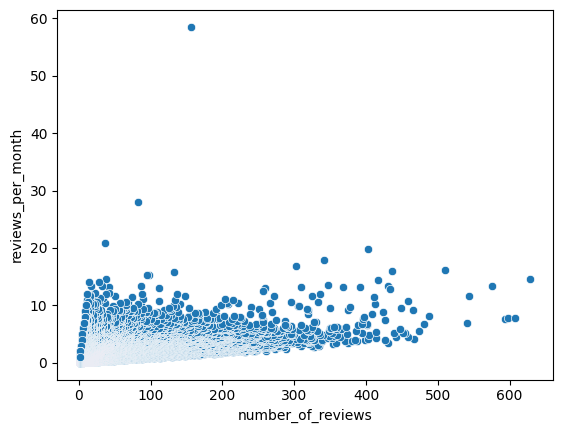

In [28]:
# relationship between the 2 - include these for analysis
sns.scatterplot(data=df, x='number_of_reviews', y='reviews_per_month')

In [29]:
# Build our linear regression model
# 0. Create a predictor matrix (X) and target column (y) - CAP X and lower y
# 2. Convert our categorical variables to numerical variables (i.e. dummy variables)
# 3. Handle the null values (in this case by filling them in)
# 1. Split our dataset into training and testing datasets

In [30]:
# Step 0: Create X and y objects

In [31]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,short_or_long
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,short
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,short
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,short
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,short
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,short


In [32]:
#list of fields we want to analyze
include_list

['room_type',
 'neighbourhood_group',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'short_or_long']

In [33]:
#created list
include_list = ['room_type', 'neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'short_or_long']

#calling list.  Dropping price so we dont predict price with price... gives algorithm the answer
df[include_list].drop(columns='price')

,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,short_or_long
0,Private room,Brooklyn,1,9,0.21,short
1,Entire home/apt,Manhattan,1,45,0.38,short
2,Private room,Manhattan,3,0,NaN,short
3,Entire home/apt,Brooklyn,1,270,4.64,short
4,Entire home/apt,Manhattan,10,9,0.10,short
...,...,...,...,...,...,...
48890,Private room,Brooklyn,2,0,NaN,short
48891,Private room,Brooklyn,4,0,NaN,short
48892,Entire home/apt,Manhattan,10,0,NaN,short
48893,Shared room,Manhattan,1,0,NaN,short


In [34]:
#create variable of X and y
X = df[include_list].drop(columns='price')
y = df['price']

In [35]:
X

,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,short_or_long
0,Private room,Brooklyn,1,9,0.21,short
1,Entire home/apt,Manhattan,1,45,0.38,short
2,Private room,Manhattan,3,0,NaN,short
3,Entire home/apt,Brooklyn,1,270,4.64,short
4,Entire home/apt,Manhattan,10,9,0.10,short
...,...,...,...,...,...,...
48890,Private room,Brooklyn,2,0,NaN,short
48891,Private room,Brooklyn,4,0,NaN,short
48892,Entire home/apt,Manhattan,10,0,NaN,short
48893,Shared room,Manhattan,1,0,NaN,short


In [36]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [37]:
# 2. Convert our categorical variables to numerical variables (i.e. dummy variables)

In [38]:
# get_dummies takes a column of categories (like colors, sizes, or countries) and
# transforms it into multiple new columns (dummy variables) that contain only 0s and 1s. 
# since we will always have one column with a value, if we drop_first we can minimize columns in results
# int will turn values to 1 and 0 - easiest according to teacher
pd.get_dummies(X, dtype='int')

,minimum_nights,number_of_reviews,reviews_per_month,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,short_or_long_long,short_or_long_short
0,1,9,0.21,0,1,0,0,1,0,0,0,0,1
1,1,45,0.38,1,0,0,0,0,1,0,0,0,1
2,3,0,NaN,0,1,0,0,0,1,0,0,0,1
3,1,270,4.64,1,0,0,0,1,0,0,0,0,1
4,10,9,0.10,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,2,0,NaN,0,1,0,0,1,0,0,0,0,1
48891,4,0,NaN,0,1,0,0,1,0,0,0,0,1
48892,10,0,NaN,1,0,0,0,0,1,0,0,0,1
48893,1,0,NaN,0,0,1,0,0,1,0,0,0,1


In [39]:
# turns 1 and 0 to true and false.  if we dont define any dtype it automatically reverts to bool
pd.get_dummies(X, dtype='bool')

,minimum_nights,number_of_reviews,reviews_per_month,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,short_or_long_long,short_or_long_short
0,1,9,0.21,False,True,False,False,True,False,False,False,False,True
1,1,45,0.38,True,False,False,False,False,True,False,False,False,True
2,3,0,NaN,False,True,False,False,False,True,False,False,False,True
3,1,270,4.64,True,False,False,False,True,False,False,False,False,True
4,10,9,0.10,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,2,0,NaN,False,True,False,False,True,False,False,False,False,True
48891,4,0,NaN,False,True,False,False,True,False,False,False,False,True
48892,10,0,NaN,True,False,False,False,False,True,False,False,False,True
48893,1,0,NaN,False,False,True,False,False,True,False,False,False,True


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   room_type            48895 non-null  object 
 1   neighbourhood_group  48895 non-null  object 
 2   minimum_nights       48895 non-null  int64  
 3   number_of_reviews    48895 non-null  int64  
 4   reviews_per_month    38843 non-null  float64
 5   short_or_long        48895 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.2+ MB


In [41]:
# create avariable for X_dummies
# drop first - drops first column as we know 1 column will always have a value
# this will reduce columns on sheet but still be able to get answer

X_dummies = pd.get_dummies(X, dtype='int', drop_first=True)

X_dummies

,minimum_nights,number_of_reviews,reviews_per_month,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,short_or_long_short
0,1,9,0.21,1,0,1,0,0,0,1
1,1,45,0.38,0,0,0,1,0,0,1
2,3,0,NaN,1,0,0,1,0,0,1
3,1,270,4.64,0,0,1,0,0,0,1
4,10,9,0.10,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
48890,2,0,NaN,1,0,1,0,0,0,1
48891,4,0,NaN,1,0,1,0,0,0,1
48892,10,0,NaN,0,0,0,1,0,0,1
48893,1,0,NaN,0,1,0,1,0,0,1


In [42]:
# isna() detect missing or "Not Available" (NA), then we add them up with sum() - PANDAS
X_dummies.isna().sum()

minimum_nights                           0
number_of_reviews                        0
reviews_per_month                    10052
room_type_Private room                   0
room_type_Shared room                    0
neighbourhood_group_Brooklyn             0
neighbourhood_group_Manhattan            0
neighbourhood_group_Queens               0
neighbourhood_group_Staten Island        0
short_or_long_short                      0
dtype: int64

<Axes: xlabel='reviews_per_month', ylabel='Count'>

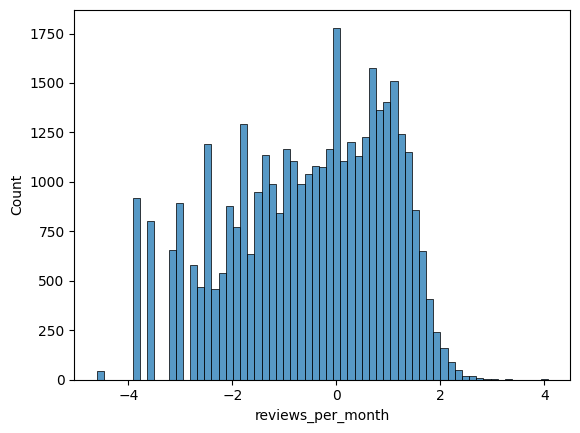

In [43]:
# as we see, we should replace anything below 0 (null, NaN) with 0, so we have a value
sns.histplot(np.log(X_dummies['reviews_per_month']))

In [44]:
# filling in NaN with 0 or any missing values
X_dummies = X_dummies.fillna(0)

In [45]:
#verify - we are not missing any values - Good to go
X_dummies.isna().sum()

minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
room_type_Private room               0
room_type_Shared room                0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
short_or_long_short                  0
dtype: int64

In [46]:
# 1. Split our dataset into training and testing datasets

#import this for testing and use in next variable - train_test_split
from sklearn.model_selection import train_test_split

In [47]:
# runs the above, randomly select rows to pull out to the training set and testing set - 4 different variables
# The training set builds the model,
# the test set provides an unbiased, final assessment of how well the model will perform in the real world
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)

In [48]:
#HERE MY INFO DOES NOT MATCH YOUR ORDER, WHY???

In [49]:
# A training set is used to teach a machine learning model by feeding it data and allowing it to learn patterns and adjust its parameters
X_train

,minimum_nights,number_of_reviews,reviews_per_month,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,short_or_long_short
17407,1,2,0.06,0,0,0,1,0,0,1
38603,5,2,1.28,0,0,1,0,0,0,1
42651,2,2,0.68,1,0,0,0,0,0,1
9211,1,177,3.78,0,0,0,1,0,0,1
7745,2,16,0.31,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
3804,1,0,0.00,0,0,0,1,0,0,1
1915,2,11,0.18,0,0,1,0,0,0,1
1385,2,54,0.74,0,0,0,1,0,0,1
38687,30,0,0.00,0,0,0,1,0,0,1


In [ ]:
# test - pulled out about 1/3
# A test set is a completely separate, unseen portion of the data used to evaluate the model's performance and generalization ability after it has been fully trained
X_test

,minimum_nights,number_of_reviews,reviews_per_month,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,short_or_long_short
46328,1,0,0.00,1,0,0,1,0,0,1
27616,2,71,3.92,0,0,1,0,0,0,1
30888,3,3,0.20,0,0,0,1,0,0,1
44247,2,10,5.56,0,0,0,1,0,0,1
2360,14,46,0.62,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
42990,3,1,0.33,1,0,1,0,0,0,1
39566,1,30,4.69,1,0,0,1,0,0,1
41614,14,0,0.00,1,0,1,0,0,0,1
45772,2,3,2.65,0,0,0,1,0,0,1


In [51]:
# This model aims to find the linear relationship between a dependent variable (target) and one or more independent variables (features) by minimizing the sum of the squares of the differences between the observed and predicted values.
from sklearn.linear_model import LinearRegression

In [52]:
linreg_model = LinearRegression()
# this creates and instance of linear regression and i am going to fit it to my training set 
linreg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# create variable to store the line of code to run when needed
my_test_predictions = linreg_model.predict(X_test)

In [54]:
# run above variable - Test prediction
my_test_predictions

array([134.21753252, 168.94768883, 243.69571992, ...,  77.0405217 ,
       237.47097046,  78.44938297], shape=(12224,))

In [55]:
#run y_test - actual value
y_test

46328    100
27616    125
30888    115
44247    189
2360      48
        ... 
42990     50
39566    129
41614     61
45772    169
20056    200
Name: price, Length: 12224, dtype: int64

In [56]:
# 
from sklearn.metrics import mean_squared_error

In [57]:
# my_test_predictions minus y_test
my_test_predictions - y_test

46328     34.217533
27616     43.947689
30888    128.695720
44247     39.809262
2360      75.355537
            ...    
42990     27.950617
39566    -11.578280
41614     16.040522
45772     68.470970
20056   -121.550617
Name: price, Length: 12224, dtype: float64

In [58]:
np.sqrt(((my_test_predictions - y_test)**2).sum())

np.float64(24528.05574738584)

In [59]:
# To compare model predictions to the test labels you must predict on X_test (not X_train). 
# If you want training residuals, subtract the training labels y_train from predictions made on X_train.

# You called linreg_model.predict(X_train) and stored it in my_test_predictions, so my_test_predictions has length = number of training rows (36671). 
# Then you tried to subtract y_test (length = number of test rows, 12224). They don't align, so NumPy/Pandas cannot broadcast/subtract them.